In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, metrics, svm,model_selection
from IPython.display import Image
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  


In [19]:
review_data = pd.read_csv('AMAZONPRODUCT.csv', encoding='latin-1')
review_data.head(n=2)
#for x in review_data.itertuples():
    #print(x[3])


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...


In [20]:
#review_data.drop(['id'],axis = 1,inplace=True)
review_data.drop(['dateAdded'],axis = 1,inplace=True)
review_data.drop(['dateUpdated'],axis = 1,inplace=True)
review_data.drop(['name'],axis = 1,inplace=True)
review_data.drop(['asins'],axis = 1,inplace=True)
review_data.drop(['brand'],axis = 1,inplace=True)
review_data.drop(['categories'],axis = 1,inplace=True)
review_data.drop(['primaryCategories'],axis = 1,inplace=True)
review_data.drop(['imageURLs'],axis = 1,inplace=True)
review_data.drop(['keys'],axis = 1,inplace=True)

In [21]:
review_data.head(n=2)


,id,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,Amazon,B00ZV9PXP2,2017-06-06T00:00:00.000Z,NaN,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...


In [22]:
review_data.drop(['manufacturer','manufacturerNumber'],axis = 1,inplace=True)

In [23]:
review_data.drop(['reviews.date','reviews.dateAdded','reviews.dateSeen','reviews.id','reviews.numHelpful','reviews.sourceURLs','reviews.sourceURLs','reviews.username'],axis = 1,inplace=True)

In [24]:
review_data.head(n=2)

,id,reviews.doRecommend,reviews.rating,reviews.text,reviews.title,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,False,3,I thought it would be as big as small paper bu...,Too small,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,True,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,https://www.newegg.com/Product/Product.aspx%25...


In [25]:
review_data.drop(['id'],axis = 1,inplace=True)

In [26]:
review_data.drop(['sourceURLs'],axis = 1,inplace=True)

In [27]:
review_data.head(n=1)

,reviews.doRecommend,reviews.rating,reviews.text,reviews.title
0,False,3,I thought it would be as big as small paper bu...,Too small


In [28]:
review_data.drop(['reviews.text','reviews.title'],axis = 1,inplace=True)

In [29]:
review_data.head(n=1)

,reviews.doRecommend,reviews.rating
0,False,3


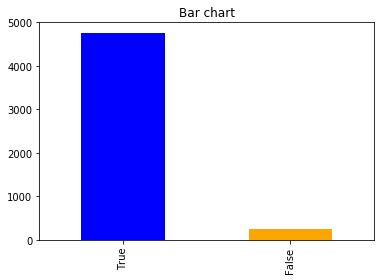

True     4765
False     235
Name: labels, dtype: int64


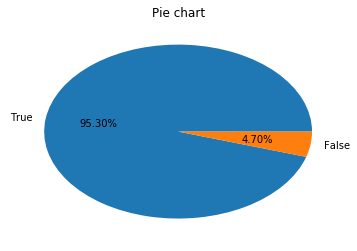

In [30]:
review_data.rename(columns={'reviews.doRecommend':'labels','reviews.rating':'rating'},inplace=True)
#review_data.head(n=2)
#print(review_data['labels'])
# mapping false t0 0 and true t0 1
#review_data['labels']=review_data['labels'].map({'False':0,'True':1})
count_Class=pd.value_counts(review_data["labels"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()
print(pd.value_counts(review_data['labels']))

count_Class.plot(kind = 'pie',  autopct='%1.2f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()



In [31]:
review_data["labels"]=review_data["labels"].map({False:1,True:0})
#print(review_data)
X_train, X_test, y_train, y_test = model_selection.train_test_split(review_data['rating'], review_data['labels'], test_size=0.33, random_state=42)
y=np.array(y_train)
y1=np.array(y_test)
countn=0
countp=0
countnT=0
countpT=0
for i in range(len(y)):
    if y[i]==0:
        countn+=1
    else:
        countp+=1
for i in range(len(y1)):
    if y1[i]==0:
        countnT+=1
    else:
        countpT+=1
print(countn)
print(countp)
print(countnT)
print(countpT)
print(y)
print(y1)

print(type(y_train))
X_train=np.matrix(X_train)
X_train=np.transpose(X_train)
print(X_train.shape)
y_train=np.matrix(y_train)
y_train=np.transpose(y_train)
print(y_train.shape)
X_test=np.matrix(X_test)
X_test=np.transpose(X_test)
print(X_test.shape)
y_test=np.matrix(y_test)
y_test=np.transpose(y_test)
print(y_test.shape)


3198
152
1567
83
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
<class 'pandas.core.series.Series'>
(3350, 1)
(3350, 1)
(1650, 1)
(1650, 1)


In [80]:
list_C = np.arange(5, 55, 5 ) 
score_train = np.zeros(len(list_C))
#print(score_train)
score_test = np.zeros(len(list_C))
recall_train = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_train= np.zeros(len(list_C))
precision_test=np.zeros(len(list_C))
count = 0
for k in ['linear','rbf','sigmoid']:
    print("CURRENT KERNEL :----->",k)
    count=0
    for C in list_C:        
        svc = svm.SVC(C=C,kernel=k)
        svc.fit(X_train, y_train)
        #score_train[count] = svc.score(X_train_cv, y_train_cv)# returns accuracy over training set
        # print("accuracy for train set at c= ",C,"is ",score_train[count])
        score_test[count]= svc.score(X_test, y_test)# returns accuracy over test set
        # print(" ------------------------******************--------------------------")
        #print("accuracy for test set at c= ",C,"is ",score_test[count])
        #recall_train[count]=metrics.recall_score(y_train_cv,svc.predict(X_train_cv))
        recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
        # precision_train[count] = metrics.precision_score(y_train_cv, svc.predict(X_train_cv))
        precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
        count = count + 1 
        
    matrix = np.matrix(np.c_[list_C, score_test, recall_test, precision_test])
    models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Test Accuracy', 'Test Recall', 'Test Precision'])
    models.head(n=10) 
    print(models)
    # confusion maricx--->
    m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
    cm=pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])
    print("\n")
    print(cm)
    print("\n \n")
    


CURRENT KERNEL :-----> linear
      C  Test Accuracy  Test Recall  Test Precision
0   5.0       0.967273     0.855422        0.628319
1  10.0       0.969697     0.445783        0.902439
2  15.0       0.967273     0.855422        0.628319
3  20.0       0.967273     0.855422        0.628319
4  25.0       0.967273     0.855422        0.628319
5  30.0       0.969697     0.445783        0.902439
6  35.0       0.967273     0.855422        0.628319
7  40.0       0.969697     0.445783        0.902439
8  45.0       0.967273     0.855422        0.628319
9  50.0       0.967273     0.855422        0.628319


          Predicted 0  Predicted 1
Actual 0         1525           42
Actual 1           12           71

 

CURRENT KERNEL :-----> rbf
      C  Test Accuracy  Test Recall  Test Precision
0   5.0       0.969697     0.445783        0.902439
1  10.0       0.969697     0.445783        0.902439
2  15.0       0.969697     0.445783        0.902439
3  20.0       0.969697     0.445783        0.902439


In [73]:
# some test data
# kernel= sigmoid
print(" enter a rating")
r=int(input())

svc.predict(r)# sigmoid kernel fails 

 enter a rating


array([0])

In [84]:
count=0
#for C in list_C:        
svc1 = svm.SVC(kernel='rbf')
svc1.fit(X_train, y_train)
        #score_train[count] = svc.score(X_train_cv, y_train_cv)# returns accuracy over training set
        # print("accuracy for train set at c= ",C,"is ",score_train[count])
score_test[count]= svc1.score(X_test, y_test)# returns accuracy over test set
        # print(" ------------------------******************--------------------------")
        #print("accuracy for test set at c= ",C,"is ",score_test[count])
        #recall_train[count]=metrics.recall_score(y_train_cv,svc.predict(X_train_cv))
recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
        # precision_train[count] = metrics.precision_score(y_train_cv, svc.predict(X_train_cv))
precision_test[count] = metrics.precision_score(y_test, svc1.predict(X_test))
count = count + 1 
m_confusion_test = metrics.confusion_matrix(y_test, svc1.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])        

,Predicted 0,Predicted 1
Actual 0,1563,4
Actual 1,46,37


In [82]:
svc1.predict(3)

array([0])

In [83]:
svc1.predict(4)
           

array([0])

In [77]:
k=svc1.predict(1)

In [53]:
print(type(k))

<class 'numpy.ndarray'>


In [78]:
print(k.shape)

(1,)


In [55]:
print(k[0])

1


In [79]:
# general interface
print("input your rating")
r=int(input())
k=svc1.predict(r)
print(k)
if k[0]==0:    
    print("A NEGATIVE REVIEW")
else:
    print(" A POSITIVE REVIEW")
    

input your rating
[0]
A NEGATIVE REVIEW


## 